In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


2022-11-19 19:16:06.043115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 19:16:10.732243: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-19 19:16:18.966927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-19 19:16:18.967295: W tensorflow/strea

In [12]:
# Read dataset from bigquery 
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()


In [46]:
query1 = """SELECT * FROM `logical-app-367922.cloud_assignment_4.minst_test`"""
job1 = client.query(query1)
test = job1.to_dataframe()
test

,label,_1x1,_1x2,_1x3,_1x4,_1x5,_1x6,_1x7,_1x8,_1x9,...,_28x19,_28x20,_28x21,_28x22,_28x23,_28x24,_28x25,_28x26,_28x27,_28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
query2 = """SELECT * FROM `logical-app-367922.cloud_assignment_4.mnist_train`"""
job2 = client.query(query2)
train = job2.to_dataframe()


In [14]:
del train['int64_field_0']


In [15]:
orig_labels = train['label']
y = tf.keras.utils.to_categorical(orig_labels) 
train.drop('label', axis=1, inplace=True)
train


,_1x1,_1x2,_1x3,_1x4,_1x5,_1x6,_1x7,_1x8,_1x9,_1x10,...,_28x19,_28x20,_28x21,_28x22,_28x23,_28x24,_28x25,_28x26,_28x27,_28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_arr = np.array(train).reshape(-1, 28, 28, 1)


In [17]:
train_arr.shape


(60020, 28, 28, 1)

Text(0.5, 0, 'Digit')

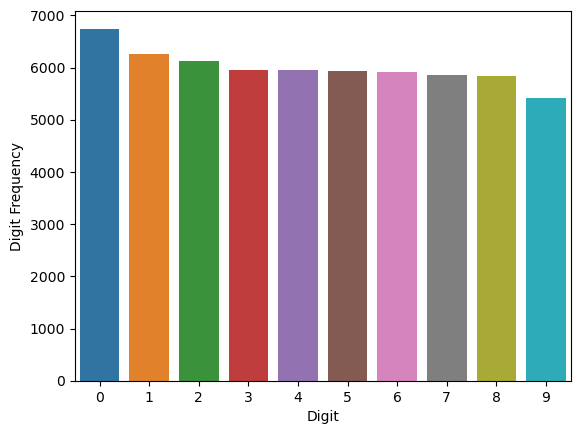

In [18]:
sns.barplot(x = orig_labels.unique(), y = orig_labels.value_counts())
plt.ylabel('Digit Frequency')
plt.xlabel('Digit')


In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def change_size(image):
    img = array_to_img(image, scale=False) #returns PIL Image
    img = img.resize((75, 75)) #resize image
    img = img.convert(mode='RGB') #makes 3 channels
    arr = img_to_array(img) #convert back to array
    return arr.astype(np.float64)


In [20]:
train_arr_75 = [change_size(img) for img in train_arr]
del train_arr
train_arr_75 = np.array(train_arr_75)
train_arr_75.shape


(60020, 75, 75, 3)

In [21]:
image_gen = ImageDataGenerator(rescale=1./255, #easier for network to interpret numbers in range [0,1]
                              zoom_range=0.1,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              validation_split=0.2) # 80/20 train/val split

train_generator = image_gen.flow(train_arr_75, 
                                 y,
                                batch_size=32,
                                shuffle=True,
                                subset='training',
                                seed=42)
valid_generator = image_gen.flow(train_arr_75,
                                 y,
                                batch_size=16,
                                shuffle=True,
                                subset='validation')
del train_arr_75 #saves RAM


In [23]:
model = Sequential()

model.add(tf.keras.applications.resnet50.ResNet50(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet'))

model.add(L.Flatten())
model.add(L.Dense(128, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#Do not use default learning rate since it is too high!


2022-11-19 19:35:32.116457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-19 19:35:32.122105: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-19 19:35:32.122224: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (660e7589b107): /proc/driver/nvidia/version does not exist
2022-11-19 19:35:32.124769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in 

In [24]:
for layer in model.layers[0].layers:
    if layer.name == 'conv5_block1_0_conv':
        break
    layer.trainable=False
    

In [25]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=5, 
          steps_per_epoch=train_generator.n//train_generator.batch_size,
         validation_steps=valid_generator.n//valid_generator.batch_size)



Epoch 1/5
1500/1500 [==============================] - 2051s 1s/step - loss: 0.1566 - accuracy: 0.9540 - val_loss: 0.0722 - val_accuracy: 0.9801
Epoch 2/5
1500/1500 [==============================] - 1889s 1s/step - loss: 0.0842 - accuracy: 0.9781 - val_loss: 0.2151 - val_accuracy: 0.9745
Epoch 3/5
1500/1500 [==============================] - 1924s 1s/step - loss: 0.0512 - accuracy: 0.9857 - val_loss: 0.0289 - val_accuracy: 0.9925
Epoch 4/5
1500/1500 [==============================] - 1980s 1s/step - loss: 0.0419 - accuracy: 0.9885 - val_loss: 0.0346 - val_accuracy: 0.9913
Epoch 5/5
1500/1500 [==============================] - 1945s 1s/step - loss: 0.0470 - accuracy: 0.9876 - val_loss: 0.0412 - val_accuracy: 0.9908


In [29]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H.%M.%S")
tf.compat.v1.keras.experimental.export_saved_model(model,'gs://cloud_assignment_4_model/keras-export'+current_time)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: `tf.keras.experimental.export_saved_model` is deprecatedand will be removed in a future version. Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
  after removing the cwd from sys.path.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

In [ ]:
labels = test['label']
y = tf.keras.utils.to_categorical(labels)
test.drop('label', axis=1, inplace=True)
test_arr = np.array(test).reshape(-1, 28, 28, 1)


In [ ]:
test_arr_75 = [change_size(img) for img in test_arr]
test_arr_75 = np.array(test_arr_75)
test_arr_75.shape


(10000, 75, 75, 3)

In [ ]:
part = test_arr_75[:100]

predictions = []

for i in part:
    predictions.append(model.predict(i.reshape(1,75,75,3).tolist()))

In [63]:
predictions[:15]


[array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         2.1838713e-19, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 